In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fin_data = pd.read_csv("./Master Data/finanical_information.csv")
cli_data = pd.read_csv("./Master Data/industry_client_details.csv")
pay_data = pd.read_csv("./Master Data/payment_information.csv")
sub_data = pd.read_csv("./Master Data/subscription_information.csv")

""" I convert data to datetime by iterating over columns using a for loop """
for col in ['start_date', 'end_date']:
    fin_data[col] = pd.to_datetime(fin_data[col])
    sub_data[col] = pd.to_datetime(sub_data[col])

pay_data['payment_date'] = pd.to_datetime(pay_data['payment_date'], errors='coerce')


Number of Finance Lending clients: 22
Number of Blockchain clients: 25


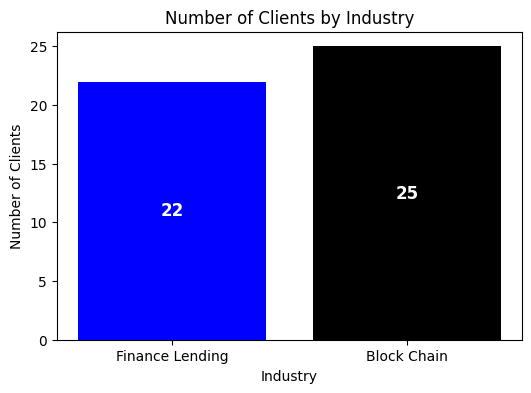

In [23]:
""" Solution1 :Finance Lending and Blockchain Client Count """

""" I used query to find Finance Lending and Block Chain Client resultset from cli_Data and then using length got count of Client """
fin_clients = len(cli_data.query("industry == 'Finance Lending'"))  # filtered and get count of resultset 
block_clients = len(cli_data.query("industry == 'Block Chain'")) 

print(f"Number of Finance Lending clients: {fin_clients}")
print(f"Number of Blockchain clients: {block_clients}")

plt.figure(figsize=(6, 4))
bars = plt.bar(['Finance Lending', 'Block Chain'], [fin_clients, block_clients], color=['blue', 'black'])
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.title('Number of Clients by Industry')
for bar, value in zip(bars, [fin_clients, block_clients]):  # I used this to display values inside bars 
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, str(value), ha='center', va='center', fontsize=12, fontweight='bold', color='white')
plt.show()


The industry with the highest renewal rate is: Gaming


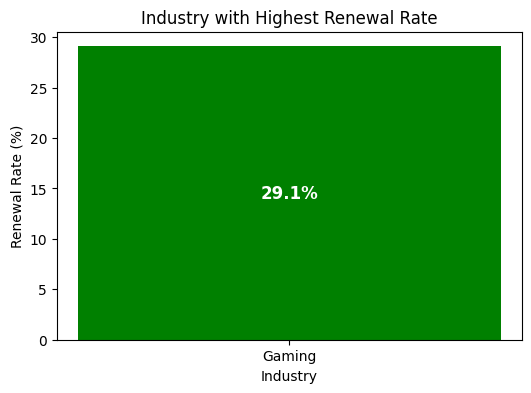

In [17]:
""" Solution2 :Industry with Highest Renewal Rate """

""" Here, I Merge Subcription data with Industry data to identify subscription renewals """
renewed_cli_data = sub_data[sub_data['renewed']].merge(cli_data, on='client_id', how='inner') # I used client_id as common key to merge two datasets
renewal_rates = renewed_cli_data['industry'].value_counts(normalize=True) * 100   # here i used normalize concept to get occurence and length of set to calculate percentage value

top_industry = renewal_rates.idxmax()   # idxmax() gets highest value
print(f"The industry with the highest renewal rate is: {top_industry}")

plt.figure(figsize=(6, 4))
bars = plt.bar([top_industry], [renewal_rates[top_industry]], color='green')
plt.xlabel('Industry')
plt.ylabel('Renewal Rate (%)')
plt.title('Industry with Highest Renewal Rate')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f"{bar.get_height():.1f}%", ha='center', va='center', fontsize=12, fontweight='bold', color='white')
plt.show()

Renewal rates by industry:
industry
Gaming             29.090909
Finance Lending    21.818182
Block Chain        20.000000
Hyper Local        16.363636
AI                 12.727273
Name: proportion, dtype: float64


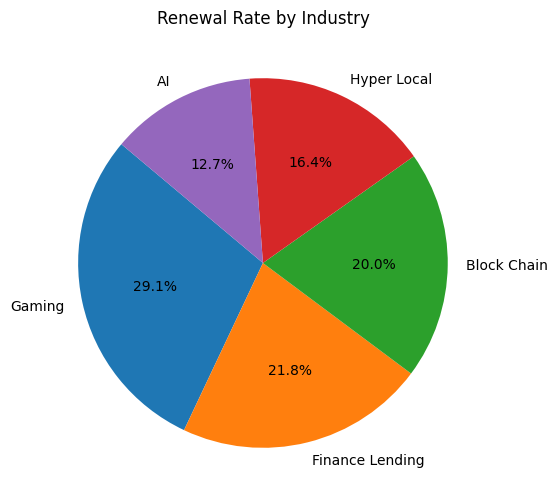

In [18]:
""" Solution3 : Renewal Rate by Each Industry """

print("Renewal rates by industry:")
print(renewal_rates) 

plt.figure(figsize=(10, 6))
plt.pie(renewal_rates, labels=renewal_rates.index, autopct='%1.1f%%', startangle=140)
plt.title('Renewal Rate by Industry')
plt.show()

The average inflation rate during subscription renewals is: 4.31%
Median payment per year:
   year  amount_paid
0  2018        235.7
1  2019        360.9
2  2020        284.5
3  2021        306.8
4  2022        288.0


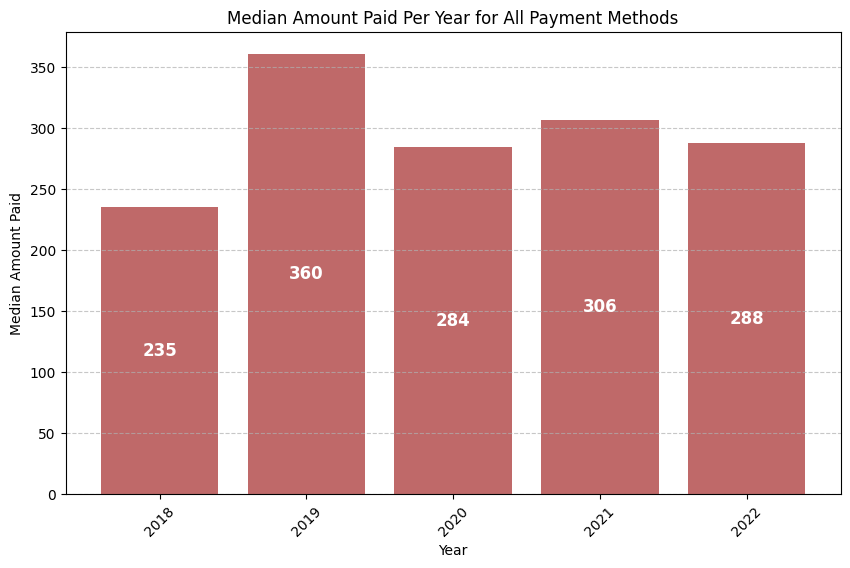

In [21]:
""" Solution4 : Median Amount Paid Per Year for All Payment Methods """

""" Here I processes financial and subscription data to uncover key trends. It counts clients in different industries, analyzes subscription renewal rates, and finds the average inflation rate during renewals. It also cleans payment data and calculates the median payment per year """

def find_inflation_rate(end_date): # Function to find the inflation rate during subscription renewal periods
    matched_data = fin_data[(fin_data['start_date'] <= end_date) & (fin_data['end_date'] >= end_date)]  # Filter matching periods
    return matched_data['inflation_rate'].values[0] if not matched_data.empty else np.nan  # Return inflation rate if found

renewed_subs = sub_data.loc[sub_data['renewed']].copy()  # Here, I Filtered renewed subscriptions from subscription dataset
renewed_subs['inflation_rate'] = renewed_subs['end_date'].apply(find_inflation_rate)  # Apply inflation function

global_avg_inflation = renewed_subs['inflation_rate'].mean()  # Mean calculation
print(f"The average inflation rate during subscription renewals is: {global_avg_inflation:.2f}%") 

pay_data.dropna(subset=['payment_date'], inplace=True)  # Here I drop invalid date rows
pay_data['year'] = pay_data['payment_date'].dt.year  # Extract year from payment date


median_pay_per_year = pay_data.groupby('year')['amount_paid'].median().reset_index()  # Calculate median payment per year to understand trends

print("Median payment per year:")
print(median_pay_per_year)  

plt.figure(figsize=(10, 6))
bars = plt.bar(median_pay_per_year['year'], median_pay_per_year['amount_paid'], color='brown', alpha=0.7)
plt.title('Median Amount Paid Per Year for All Payment Methods')
plt.xlabel('Year')
plt.ylabel('Median Amount Paid')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, median_pay_per_year['amount_paid']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, str(int(value)), ha='center', va='center', fontsize=12, fontweight='bold', color='white')
plt.show()
